<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [1]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.4.1
Using keras version 2.4.3


## Loading and preparing the MNIST dataset

Again, load the dataset via ```keras.datasets```, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [2]:
from keras.datasets import mnist
# START CODE HERE
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# END CODE HERE

In [3]:
from keras.utils.np_utils import to_categorical
# START CODE HERE
Y_train = to_categorical(y_train)  
Y_test = to_categorical(y_test) 
# END CODE HERE

In [4]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],img_rows*img_cols)
# START CODE HERE
X_test = X_test.reshape(X_test.shape[0],img_rows*img_cols)
# END CODE HERE

# Cast pixels from uint8 to float32
X_train = X_train.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE
from sklearn.preprocessing import StandardScaler
# Scale data (each feature will have average equal to 0 and unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# END CODE HERE

## Defining the neural network architecture (i.e., the network model)

You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [5]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE
input_shape = X_train.shape[1]
output_shape = Y_train.shape[1]

n_hidden_1 = 300 # 1st layer number of neurons

model_ex1 = Sequential() 
model_ex1.add(Dense(output_shape,input_dim=input_shape, activation="softmax"))

model = Sequential() 
model.add(Dense(n_hidden_1,input_dim=input_shape, activation="sigmoid"))
model.add(Dense(output_shape, activation="softmax"))

# END CODE HERE

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [6]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

# START CODE HERE
learning_rate = 0.01
model_ex1.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=learning_rate),metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=learning_rate),metrics=["accuracy"])

# END CODE HERE
# We can now have a look at the defined model topology
print("Classifier of the first exercise")
model_ex1.summary()
print("\n\nFully connected network")
model.summary()

Classifier of the first exercise
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Fully connected network
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [7]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
batch_size = 20


print('Training esercise 1')
model_ex1.fit(X_train, Y_train, validation_split=0.33, epochs=epochs, batch_size=batch_size, verbose=2)

print('\nTesting exercise 1')
model_ex1.evaluate(X_test,  Y_test, verbose=2) 

print('\n\nTraining')
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=2)

print('\nTesting')
model.evaluate(X_test,  Y_test, verbose=2) 
# END CODE HERE

Training esercise 1
Epoch 1/10
2010/2010 - 5s - loss: 0.4746 - accuracy: 0.8683 - val_loss: 0.3476 - val_accuracy: 0.9063
Epoch 2/10
2010/2010 - 4s - loss: 0.3213 - accuracy: 0.9107 - val_loss: 0.3276 - val_accuracy: 0.9109
Epoch 3/10
2010/2010 - 4s - loss: 0.2984 - accuracy: 0.9177 - val_loss: 0.3189 - val_accuracy: 0.9135
Epoch 4/10
2010/2010 - 4s - loss: 0.2854 - accuracy: 0.9206 - val_loss: 0.3154 - val_accuracy: 0.9164
Epoch 5/10
2010/2010 - 4s - loss: 0.2778 - accuracy: 0.9230 - val_loss: 0.3131 - val_accuracy: 0.9160
Epoch 6/10
2010/2010 - 4s - loss: 0.2703 - accuracy: 0.9244 - val_loss: 0.3137 - val_accuracy: 0.9176
Epoch 7/10
2010/2010 - 4s - loss: 0.2655 - accuracy: 0.9267 - val_loss: 0.3127 - val_accuracy: 0.9165
Epoch 8/10
2010/2010 - 4s - loss: 0.2617 - accuracy: 0.9268 - val_loss: 0.3122 - val_accuracy: 0.9170
Epoch 9/10
2010/2010 - 4s - loss: 0.2584 - accuracy: 0.9280 - val_loss: 0.3121 - val_accuracy: 0.9171
Epoch 10/10
2010/2010 - 4s - loss: 0.2549 - accuracy: 0.9287 -

[0.23607659339904785, 0.9312000274658203]

## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

<Blockquote> 

As can be seen in the graphs bellow the loss function goes down for both the train and validation set, while the accuracy of both sets goes up. This, besides our results for the Test set that can be seen above, indicates that the model hasn’t overfitted. 

One interesting fact to notice in the graph is that in fact, the validation loss is smaller than the train for the first epochs. Similarly, the accuracy is higher. The Keras Q&A offers an explanation for this:

*“ … the training loss that Keras displays is the average of the losses for each batch of training data, over the current epoch. Because your model is changing over time, the loss over the first batches of an epoch is generally higher than over the last batches. This can bring the epoch-wise average down. On the other hand, the testing loss for an epoch is computed using the model as it is at the end of the epoch, resulting in a lower loss.”*


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


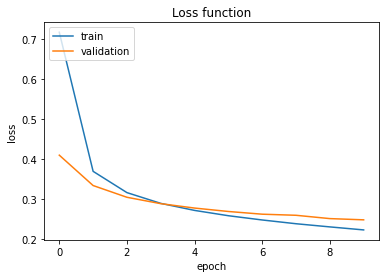

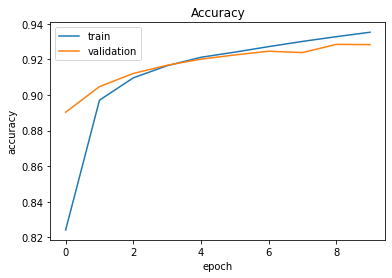

In [8]:
# We now want to plot the train and validation loss functions and accuracy curves
import matplotlib.pyplot as plt
print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# END CODE HERE
plt.show()


## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

## Overall comments for the experiments:
<Blockquote> 

- It’s observed that when the batch size is increased, the training time decreases for each epoch, which was expected (the training time for each epoch was approximately 3 seconds for a size 20 batch and 1 second for a size 100 batch). In contrast, it can be observed in the graph that the results, specially in the firsts epochs are poorest. In certain cases, it seems that having a larger batch size for a larger number of epochs might yield similar results in a smaller computational time.

- For the Relu activation function, the results seem to improve (in comparison to the sigmoid that was usen before). One advantage of using Relu in the middle layers of a network is that they won’t suffer with vanishing gradients problem. (The network used in this exercise is relatively small, so even with the sigmoid function, this problem doesn’t seem apparent).

- At last, using a larger network also gave better results, but slightly. The major improvement from the reference test is from using the Relu function and not from adding this extra layers. Having an overly complicated network might also represents some problems, such as overfitting or falling in a local minimum during the optimization. <br><br>

Other solutions to improve results could be proposed, such as applying batch normalization. 


## Experiment increasing the size of the batch and compare the performance with reference.

In [9]:
# START CODE HERE
input_shape = X_train.shape[1]
output_shape = Y_train.shape[1]

n_hidden_1 = 300 # 1st layer number of neurons

model1 = Sequential() 
model1.add(Dense(n_hidden_1,input_dim=input_shape, activation="sigmoid"))
model1.add(Dense(output_shape, activation="softmax"))

learning_rate = 0.01
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=learning_rate),metrics=["accuracy"])

batch_size = 100
print('Training')
history2 = model1.fit(X_train, Y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=2)

print('\nTesting')
model1.evaluate(X_test,  Y_test, verbose=2) 

Training
Epoch 1/10
420/420 - 1s - loss: 1.3634 - accuracy: 0.6768 - val_loss: 0.8759 - val_accuracy: 0.8260
Epoch 2/10
420/420 - 1s - loss: 0.7322 - accuracy: 0.8389 - val_loss: 0.6074 - val_accuracy: 0.8627
Epoch 3/10
420/420 - 1s - loss: 0.5612 - accuracy: 0.8665 - val_loss: 0.5012 - val_accuracy: 0.8765
Epoch 4/10
420/420 - 1s - loss: 0.4813 - accuracy: 0.8778 - val_loss: 0.4438 - val_accuracy: 0.8856
Epoch 5/10
420/420 - 1s - loss: 0.4340 - accuracy: 0.8862 - val_loss: 0.4078 - val_accuracy: 0.8918
Epoch 6/10
420/420 - 1s - loss: 0.4027 - accuracy: 0.8924 - val_loss: 0.3837 - val_accuracy: 0.8951
Epoch 7/10
420/420 - 1s - loss: 0.3799 - accuracy: 0.8961 - val_loss: 0.3652 - val_accuracy: 0.8992
Epoch 8/10
420/420 - 1s - loss: 0.3626 - accuracy: 0.8992 - val_loss: 0.3515 - val_accuracy: 0.9014
Epoch 9/10
420/420 - 1s - loss: 0.3487 - accuracy: 0.9026 - val_loss: 0.3407 - val_accuracy: 0.9044
Epoch 10/10
420/420 - 1s - loss: 0.3372 - accuracy: 0.9053 - val_loss: 0.3313 - val_accurac

[0.32560861110687256, 0.9075000286102295]

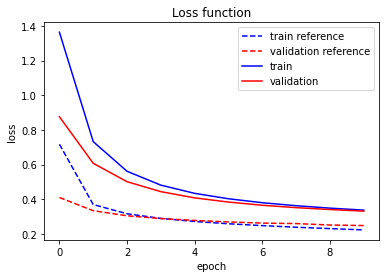

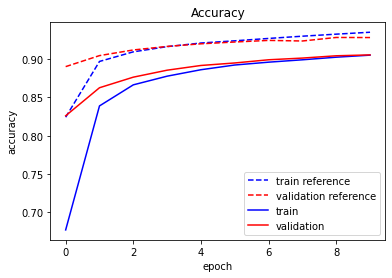

In [10]:
# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'],"b--")
plt.plot(history.history['val_loss'],"r--")
plt.plot(history2.history['loss'], color ='b')
plt.plot(history2.history['val_loss'],color='r')
plt.title('Loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train reference', 'validation reference', 'train', 'validation'], loc='upper right')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'],"b--")
plt.plot(history.history['val_accuracy'],"r--")
plt.plot(history2.history['accuracy'], color ='b')
plt.plot(history2.history['val_accuracy'],color='r')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train reference', 'validation reference', 'train', 'validation'], loc='lower right')
# END CODE HERE
plt.show()

## Experiment replacing the sigmoid activations with Relus and note what happens.

In [11]:
# START CODE HERE
input_shape = X_train.shape[1]
output_shape = Y_train.shape[1]

n_hidden_1 = 300 # 1st layer number of neurons

model2 = Sequential() 
model2.add(Dense(n_hidden_1,input_dim=input_shape, activation="relu"))
model2.add(Dense(output_shape, activation="softmax"))

learning_rate = 0.01
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=learning_rate),metrics=["accuracy"])

batch_size = 100
print('Training')
history2 = model2.fit(X_train, Y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=2)

print('\nTesting')
model2.evaluate(X_test,  Y_test, verbose=2) 
# END CODE HERE

Training
Epoch 1/10
420/420 - 1s - loss: 0.7302 - accuracy: 0.7988 - val_loss: 0.4024 - val_accuracy: 0.8914
Epoch 2/10
420/420 - 1s - loss: 0.3452 - accuracy: 0.9044 - val_loss: 0.3154 - val_accuracy: 0.9131
Epoch 3/10
420/420 - 1s - loss: 0.2783 - accuracy: 0.9210 - val_loss: 0.2781 - val_accuracy: 0.9226
Epoch 4/10
420/420 - 1s - loss: 0.2414 - accuracy: 0.9310 - val_loss: 0.2542 - val_accuracy: 0.9297
Epoch 5/10
420/420 - 1s - loss: 0.2167 - accuracy: 0.9385 - val_loss: 0.2379 - val_accuracy: 0.9332
Epoch 6/10
420/420 - 1s - loss: 0.1979 - accuracy: 0.9434 - val_loss: 0.2255 - val_accuracy: 0.9367
Epoch 7/10
420/420 - 1s - loss: 0.1829 - accuracy: 0.9483 - val_loss: 0.2154 - val_accuracy: 0.9396
Epoch 8/10
420/420 - 1s - loss: 0.1705 - accuracy: 0.9517 - val_loss: 0.2080 - val_accuracy: 0.9422
Epoch 9/10
420/420 - 1s - loss: 0.1600 - accuracy: 0.9552 - val_loss: 0.2002 - val_accuracy: 0.9446
Epoch 10/10
420/420 - 1s - loss: 0.1509 - accuracy: 0.9578 - val_loss: 0.1945 - val_accurac

[0.18387067317962646, 0.9488999843597412]

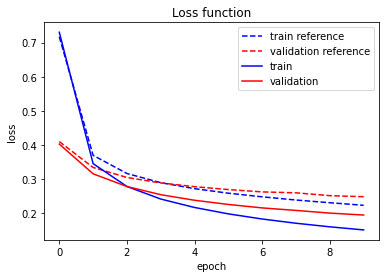

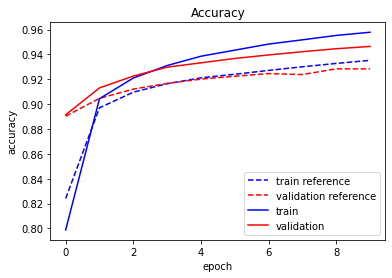

In [12]:
# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'],"b--")
plt.plot(history.history['val_loss'],"r--")
plt.plot(history2.history['loss'], color ='b')
plt.plot(history2.history['val_loss'],color='r')
plt.title('Loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train reference', 'validation reference', 'train', 'validation'], loc='upper right')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'],"b--")
plt.plot(history.history['val_accuracy'],"r--")
plt.plot(history2.history['accuracy'], color ='b')
plt.plot(history2.history['val_accuracy'],color='r')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train reference', 'validation reference', 'train', 'validation'], loc='lower right')
# END CODE HERE
plt.show()

## Experiment with a larger architecture

In [13]:
# START CODE HERE
input_shape = X_train.shape[1]
output_shape = Y_train.shape[1]

n_hidden_1 = 300 # 2nd layer number of neurons
n_hidden_2 = 128
n_hidden_3 = 84


model3 = Sequential() 
model3.add(Dense(n_hidden_1,input_dim=input_shape, activation="relu"))
model3.add(Dense(n_hidden_2, activation="relu"))
model3.add(Dense(n_hidden_3, activation="relu"))
model3.add(Dense(output_shape, activation="softmax"))

learning_rate = 0.01
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=learning_rate),metrics=["accuracy"])

batch_size = 100
print('Training')
history2 = model3.fit(X_train, Y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=2)

print('\nTesting')
model3.evaluate(X_test,  Y_test, verbose=2) 
# END CODE HERE

Training
Epoch 1/10
420/420 - 1s - loss: 0.9316 - accuracy: 0.7400 - val_loss: 0.4110 - val_accuracy: 0.8845
Epoch 2/10
420/420 - 1s - loss: 0.3325 - accuracy: 0.9058 - val_loss: 0.2981 - val_accuracy: 0.9155
Epoch 3/10
420/420 - 1s - loss: 0.2471 - accuracy: 0.9282 - val_loss: 0.2577 - val_accuracy: 0.9278
Epoch 4/10
420/420 - 1s - loss: 0.2044 - accuracy: 0.9407 - val_loss: 0.2337 - val_accuracy: 0.9345
Epoch 5/10
420/420 - 1s - loss: 0.1759 - accuracy: 0.9483 - val_loss: 0.2179 - val_accuracy: 0.9389
Epoch 6/10
420/420 - 1s - loss: 0.1549 - accuracy: 0.9547 - val_loss: 0.2065 - val_accuracy: 0.9438
Epoch 7/10
420/420 - 1s - loss: 0.1384 - accuracy: 0.9605 - val_loss: 0.1991 - val_accuracy: 0.9461
Epoch 8/10
420/420 - 1s - loss: 0.1244 - accuracy: 0.9641 - val_loss: 0.1935 - val_accuracy: 0.9471
Epoch 9/10
420/420 - 1s - loss: 0.1131 - accuracy: 0.9677 - val_loss: 0.1890 - val_accuracy: 0.9504
Epoch 10/10
420/420 - 1s - loss: 0.1032 - accuracy: 0.9706 - val_loss: 0.1859 - val_accurac

[0.15488390624523163, 0.9537000060081482]

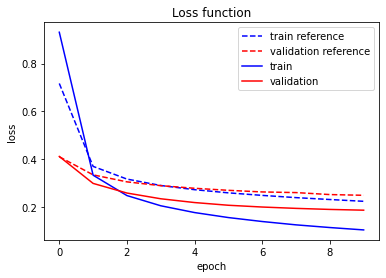

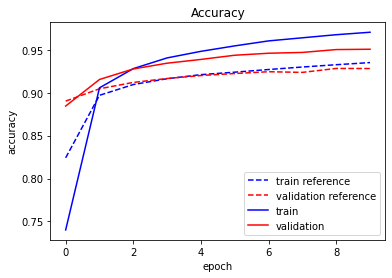

In [14]:
# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'],"b--")
plt.plot(history.history['val_loss'],"r--")
plt.plot(history2.history['loss'], color ='b')
plt.plot(history2.history['val_loss'],color='r')
plt.title('Loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train reference', 'validation reference', 'train', 'validation'], loc='upper right')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'],"b--")
plt.plot(history.history['val_accuracy'],"r--")
plt.plot(history2.history['accuracy'], color ='b')
plt.plot(history2.history['val_accuracy'],color='r')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train reference', 'validation reference', 'train', 'validation'], loc='lower right')
# END CODE HERE
plt.show()